In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df=pd.read_csv("C:/Users/galiv/Downloads/home-credit-default-risk/application_train.csv")

In [4]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
df.SK_ID_CURR

0         100002
1         100003
2         100004
3         100006
4         100007
           ...  
307506    456251
307507    456252
307508    456253
307509    456254
307510    456255
Name: SK_ID_CURR, Length: 307511, dtype: int64

In [7]:
df.shape

(307511, 122)

In [8]:
default_rate=df['TARGET'].mean()*100

In [9]:
default_rate

np.float64(8.072881945686495)

In [ ]:
### 3rd

In [10]:
category_counts = df['TARGET'].value_counts()
print(category_counts)


TARGET
0    282686
1     24825
Name: count, dtype: int64


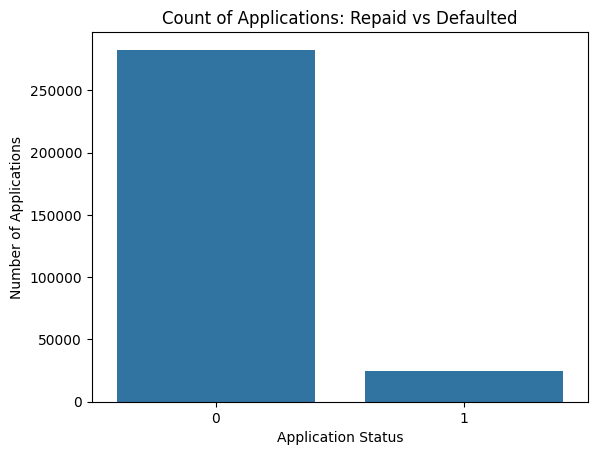

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='TARGET',data=df)
plt.title('Count of Applications: Repaid vs Defaulted')
plt.ylabel('Number of Applications')
plt.xlabel('Application Status')
plt.show()


In [12]:
##4th class

In [13]:
loan_distribution = df['NAME_CONTRACT_TYPE'].value_counts()

In [14]:
print(loan_distribution)

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


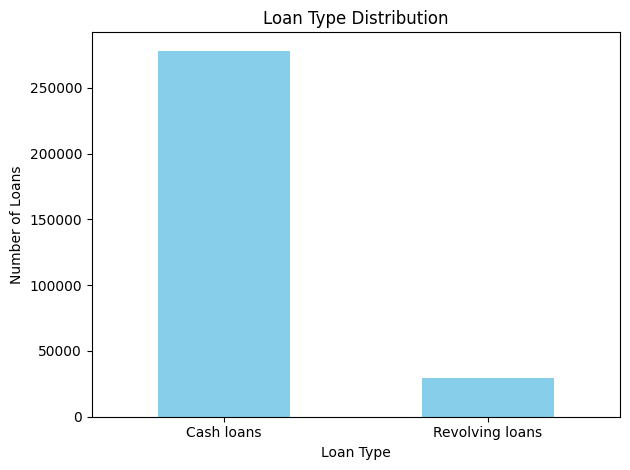

In [15]:
loan_distribution.plot(kind='bar', color='skyblue', title='Loan Type Distribution')
plt.xlabel('Loan Type')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#5th

In [16]:
default_rate_by_type = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean().reset_index()
default_rate_by_type = default_rate_by_type.rename(columns={'TARGET': 'Default_Rate'})
print(default_rate_by_type)

  NAME_CONTRACT_TYPE  Default_Rate
0         Cash loans      0.083459
1    Revolving loans      0.054783


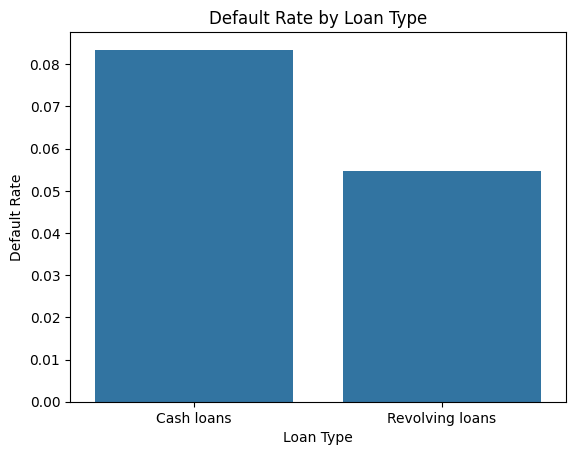

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_by_type,
    x='NAME_CONTRACT_TYPE',
    y='Default_Rate'
)
plt.title('Default Rate by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Default Rate')
plt.show()

In [18]:
### 6th

In [19]:


gender_counts = df['CODE_GENDER'].value_counts()
gender_percent = df['CODE_GENDER'].value_counts(normalize=True) * 100

C:\Users\galiv\AppData\Local\Temp\ipykernel_7608\2053065509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CODE_GENDER', order=gender_counts.index, palette='pastel')


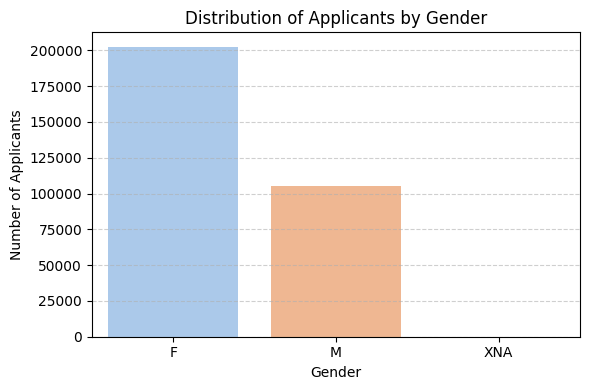

In [20]:
plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='CODE_GENDER', order=gender_counts.index, palette='pastel')

plt.title('Distribution of Applicants by Gender')

plt.xlabel('Gender')

plt.ylabel('Number of Applicants')

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()

In [21]:
# Group by gender and calculate total loans and defaults
gender_default = df.groupby('CODE_GENDER')['TARGET'].agg(
    Total_Loans='count',
    Defaults='sum'
).reset_index()

# Calculate default rate
gender_default['Default Rate (%)'] = (gender_default['Defaults'] / gender_default['Total_Loans']) * 100

# Show result
print(gender_default)


  CODE_GENDER  Total_Loans  Defaults  Default Rate (%)
0           F       202448     14170          6.999328
1           M       105059     10655         10.141920
2         XNA            4         0          0.000000


In [ ]:
### 7th

In [22]:
default_rate_by_gender = df.groupby('CODE_GENDER')['TARGET'].agg(['mean', 'count']).reset_index()
default_rate_by_gender = default_rate_by_gender.rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
print(default_rate_by_gender)

  CODE_GENDER  Default_Rate  Count_Applications
0           F      0.069993              202448
1           M      0.101419              105059
2         XNA      0.000000                   4


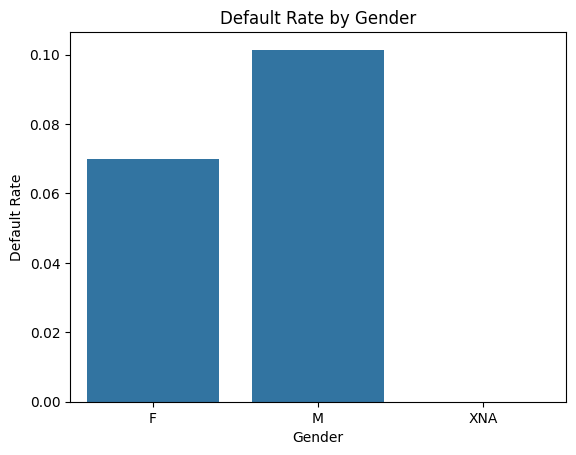

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_by_gender,
    x='CODE_GENDER',
    y='Default_Rate'
)
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate')
plt.show()

In [22]:
###6th

In [24]:
gender_distribution = df['CODE_GENDER'].value_counts()
print(gender_distribution)

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


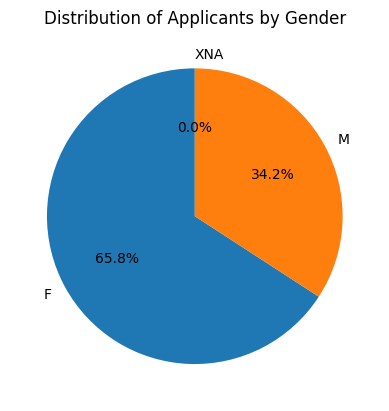

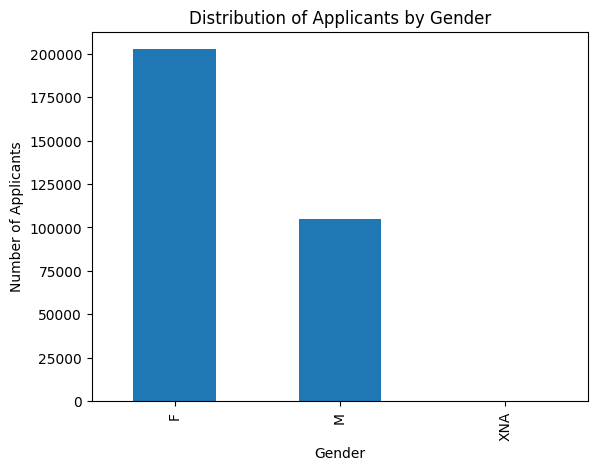

In [25]:
import matplotlib.pyplot as plt

# Pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Applicants by Gender')
plt.ylabel('')
plt.show()

# Or Bar chart
gender_distribution.plot(kind='bar')
plt.title('Distribution of Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.show()

In [ ]:
####part 2

count    307511.000000
mean         43.936992
std          11.956084
min          20.500000
25%          34.000000
50%          43.200000
75%          53.900000
max          69.100000
Name: AGE_YEARS, dtype: float64


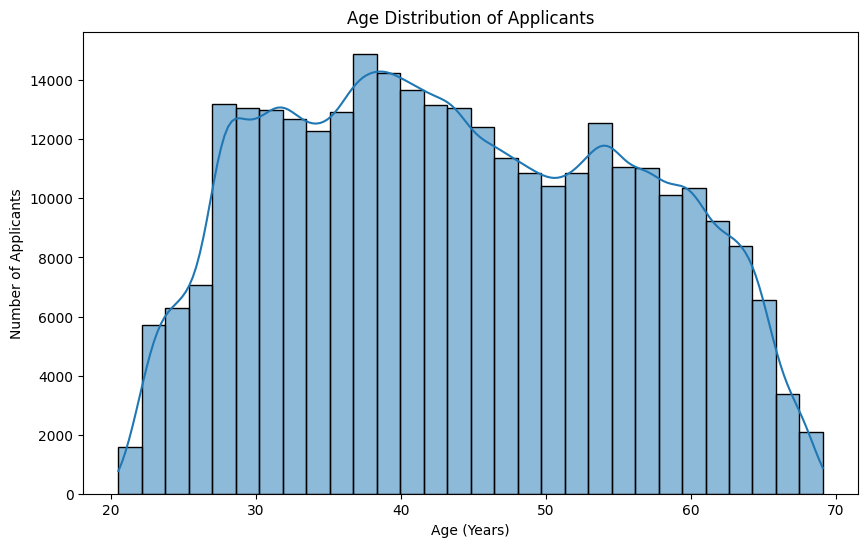

In [26]:
# Convert to positive age in years(8)
df['AGE_YEARS'] = (-df['DAYS_BIRTH'] / 365).round(1)

# Check the distribution
print(df['AGE_YEARS'].describe())

# Plot it
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['AGE_YEARS'], bins=30, kde=True)
plt.title('Age Distribution of Applicants')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Applicants')
plt.show()

In [27]:
## 9th
import pandas as pd
df['AGE_YEARS'] = (-df['DAYS_BIRTH'] / 365).round(1)


bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['AGE_GROUP'] = pd.cut(df['AGE_YEARS'], bins=bins, labels=labels, right=False)


default_rate_by_age = df.groupby('AGE_GROUP')['TARGET'].mean().reset_index()
default_rate_by_age = default_rate_by_age.rename(columns={'TARGET': 'Default_Rate'})
print(default_rate_by_age)

  AGE_GROUP  Default_Rate
0     20-30      0.114717
1     30-40      0.095841
2     40-50      0.076630
3     50-60      0.061470
4     60-70      0.049203


C:\Users\galiv\AppData\Local\Temp\ipykernel_7608\3751859686.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_by_age = df.groupby('AGE_GROUP')['TARGET'].mean().reset_index()


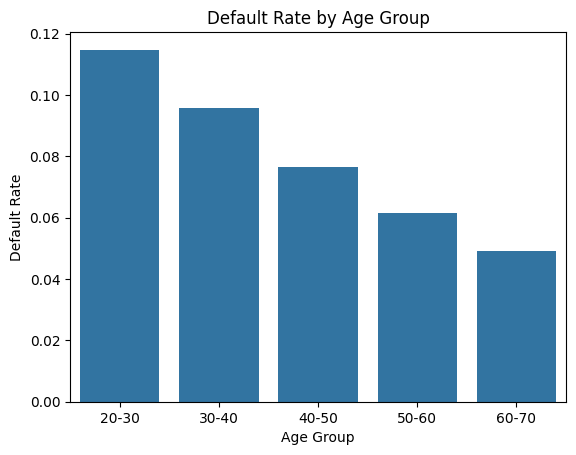

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=default_rate_by_age, x='AGE_GROUP', y='Default_Rate')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()

In [28]:
#### 10

In [29]:
family_default_rate = df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().reset_index()
family_default_rate.columns = ['Family Status', 'Default Rate']

C:\Users\galiv\AppData\Local\Temp\ipykernel_7608\2089545936.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_default_rate, x='Default Rate', y='Family Status', palette='viridis')


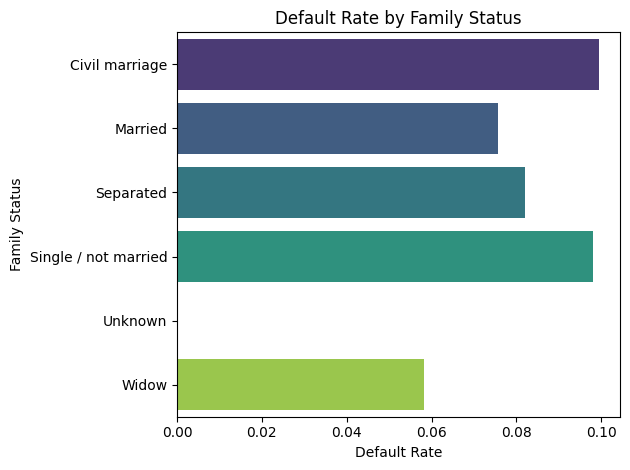

In [30]:

sns.barplot(data=family_default_rate, x='Default Rate', y='Family Status', palette='viridis')
plt.title('Default Rate by Family Status')
plt.xlabel('Default Rate')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()

In [ ]:
#### 11

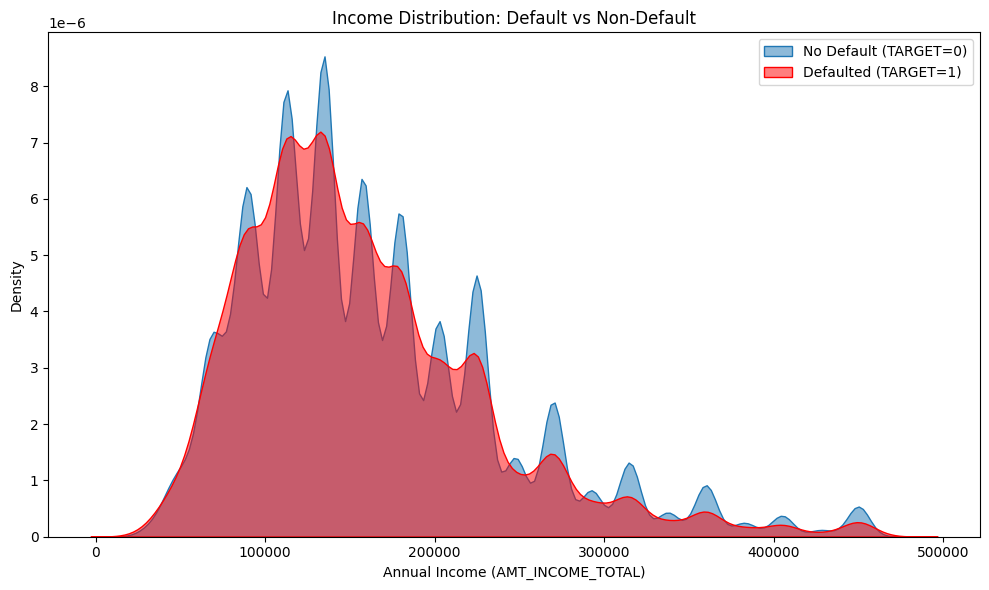

In [31]:


# Optional: Remove extreme outliers for clearer plot
df = df[df['AMT_INCOME_TOTAL'] < df['AMT_INCOME_TOTAL'].quantile(0.99)]

# Plot overlapping KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['TARGET'] == 0], x='AMT_INCOME_TOTAL', label='No Default (TARGET=0)', fill=True, alpha=0.5)
sns.kdeplot(data=df[df['TARGET'] == 1], x='AMT_INCOME_TOTAL', label='Defaulted (TARGET=1)', fill=True, alpha=0.5, color='red')

# Labels and formatting
plt.title('Income Distribution: Default vs Non-Default')
plt.xlabel('Annual Income (AMT_INCOME_TOTAL)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
##### 12

In [32]:
education_breakdown = df['NAME_EDUCATION_TYPE'].value_counts().reset_index()
education_breakdown.columns = ['NAME_EDUCATION_TYPE', 'Count_Applicants']
print(education_breakdown)

             NAME_EDUCATION_TYPE  Count_Applicants
0  Secondary / secondary special            217468
1               Higher education             72848
2              Incomplete higher             10139
3                Lower secondary              3806
4                Academic degree               156


Text(0, 0.5, 'Education Level')

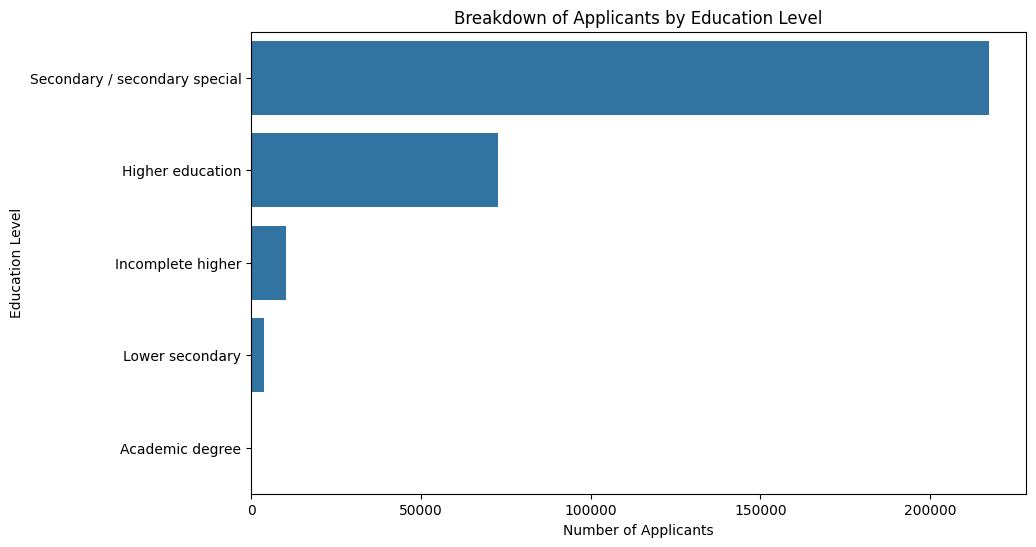

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=education_breakdown,
    y='NAME_EDUCATION_TYPE',
    x='Count_Applicants',
    order=education_breakdown['NAME_EDUCATION_TYPE']
)

plt.title('Breakdown of Applicants by Education Level')
plt.xlabel('Number of Applicants')
plt.ylabel('Education Level')

In [ ]:
##### 13

In [34]:
# Calculate default rate by education level
default_rate_edu = (
    df.groupby('NAME_EDUCATION_TYPE')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
)

print(default_rate_edu)

             NAME_EDUCATION_TYPE  Default_Rate  Count_Applications
0                Academic degree      0.019231                 156
1               Higher education      0.054003               72848
2              Incomplete higher      0.084920               10139
3                Lower secondary      0.109564                3806
4  Secondary / secondary special      0.089402              217468


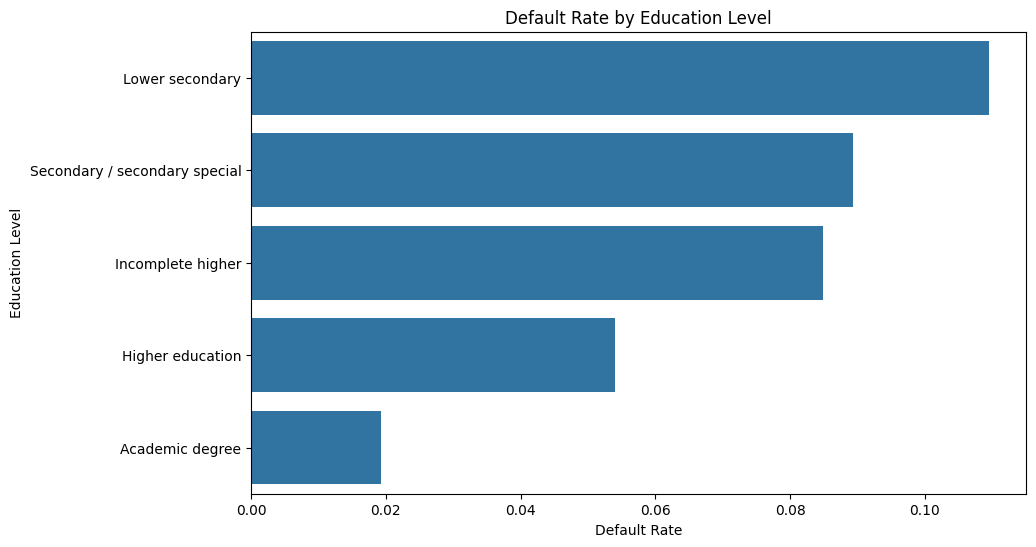

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=default_rate_edu,
    x='Default_Rate',
    y='NAME_EDUCATION_TYPE',
    order=default_rate_edu.sort_values('Default_Rate', ascending=False)['NAME_EDUCATION_TYPE']
)

plt.title('Default Rate by Education Level')
plt.xlabel('Default Rate')
plt.ylabel('Education Level')
plt.show()

In [34]:
#####14

In [36]:
df['Has_Children'] = df['CNT_CHILDREN'].apply(lambda x: 'With Children' if x > 0 else 'No Children')
default_rate_by_children = df.groupby('Has_Children')['TARGET'].mean().reset_index()
default_rate_by_children.columns = ['Child Status', 'Default Rate']

C:\Users\galiv\AppData\Local\Temp\ipykernel_7608\521897231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Has_Children'] = df['CNT_CHILDREN'].apply(lambda x: 'With Children' if x > 0 else 'No Children')


    Child Status  Default Rate
0    No Children      0.077313
1  With Children      0.089630


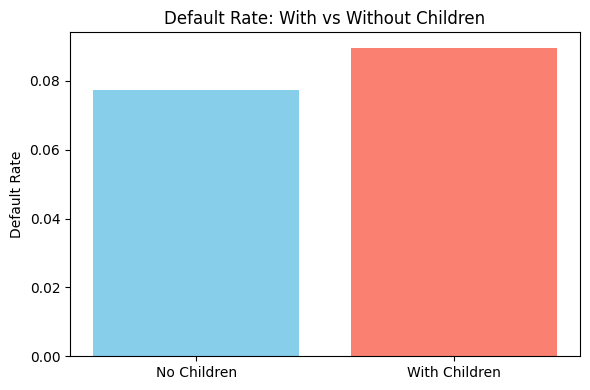

In [37]:
print(default_rate_by_children)

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(default_rate_by_children['Child Status'], default_rate_by_children['Default Rate'], color=['skyblue', 'salmon'])
plt.title('Default Rate: With vs Without Children')
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

In [38]:
####15
# Calculate default rate by car ownership
default_rate_car = (
    df.groupby('FLAG_OWN_CAR')['TARGET']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'Default_Rate', 'count': 'Count_Applications'})
)

print(default_rate_car)

  FLAG_OWN_CAR  Default_Rate  Count_Applications
0            N      0.085113              201790
1            Y      0.072905              102627


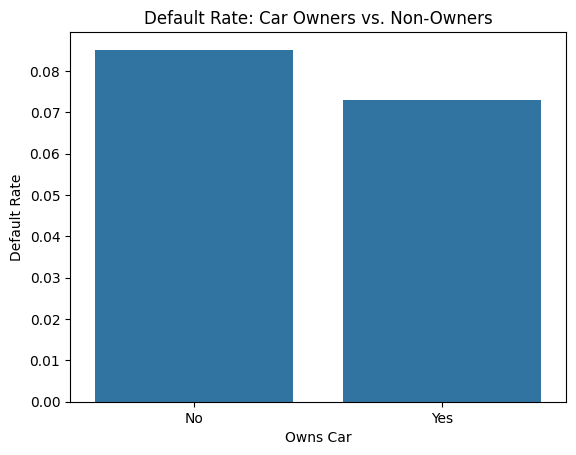

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_car,
    x='FLAG_OWN_CAR',
    y='Default_Rate'
)

plt.title('Default Rate: Car Owners vs. Non-Owners')
plt.xlabel('Owns Car')
plt.ylabel('Default Rate')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: map 'N'/'Y' to labels if you want
plt.show()

In [55]:
print(df.columns)


Index(['ORGANIZATION_TYPE', 'TARGET', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL',
       'CITY'],
      dtype='object')


In [54]:
df.columns = df.columns.str.strip().str.upper()  # Normalize column names


In [53]:
print('FLAG_OWN_CAR' in df.columns)  # Should return True


False


In [50]:
if 'FLAG_OWN_CAR' in df.columns:
    # Safe to access
    print(df['FLAG_OWN_CAR'].value_counts())
else:
    print("Column FLAG_OWN_CAR not found.")


Column FLAG_OWN_CAR not found.


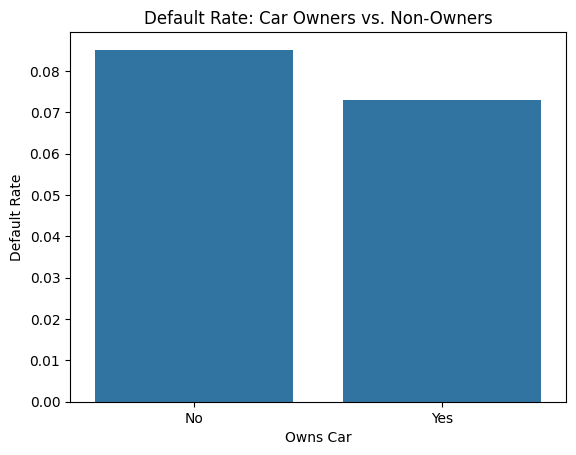

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=default_rate_car,
    x='FLAG_OWN_CAR',
    y='Default_Rate'
)

plt.title('Default Rate: Car Owners vs. Non-Owners')
plt.xlabel('Owns Car')
plt.ylabel('Default Rate')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: prettier labels
plt.show()

In [ ]:
###17

In [48]:
# Group by housing type
housing_stats = (
    df.groupby('NAME_HOUSING_TYPE')['TARGET']
    .agg(['count', 'mean'])
    .reset_index()
    .rename(columns={'count': 'Count_Applicants', 'mean': 'Default_Rate'})
)

print(housing_stats)

KeyError: 'NAME_HOUSING_TYPE'

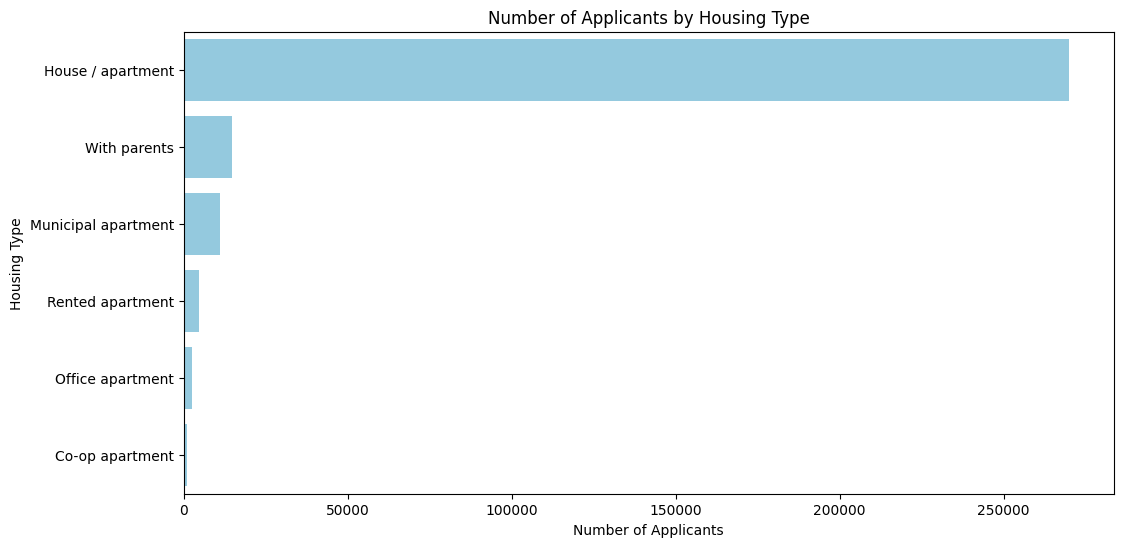

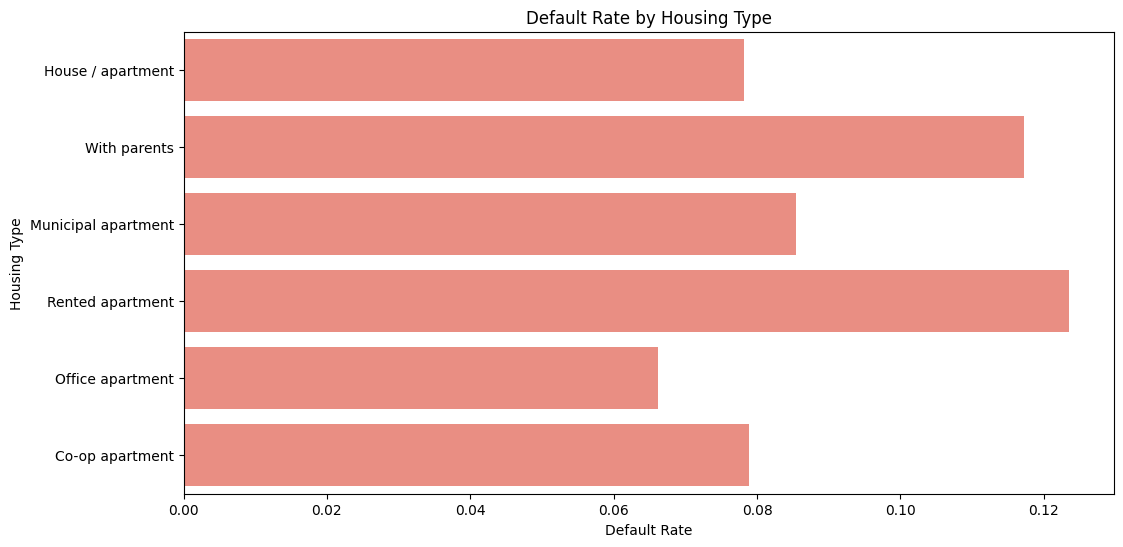

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by number of applicants
housing_stats = housing_stats.sort_values('Count_Applicants', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=housing_stats,
    y='NAME_HOUSING_TYPE',
    x='Count_Applicants',
    color='skyblue'
)
plt.title('Number of Applicants by Housing Type')
plt.xlabel('Number of Applicants')
plt.ylabel('Housing Type')
plt.show()

# Plot default rate as well
plt.figure(figsize=(12, 6))
sns.barplot(
    data=housing_stats,
    y='NAME_HOUSING_TYPE',
    x='Default_Rate',
    color='salmon'
)
plt.title('Default Rate by Housing Type')
plt.xlabel('Default Rate')
plt.ylabel('Housing Type')
plt.show()

In [43]:
####18
# Summary statistics
print(df['AMT_CREDIT'].describe())

# Output includes:
# count, mean, std, min, 25%, 50% (median), 75%, max

count    3.044170e+05
mean     5.937549e+05
std      3.966523e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.094000e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


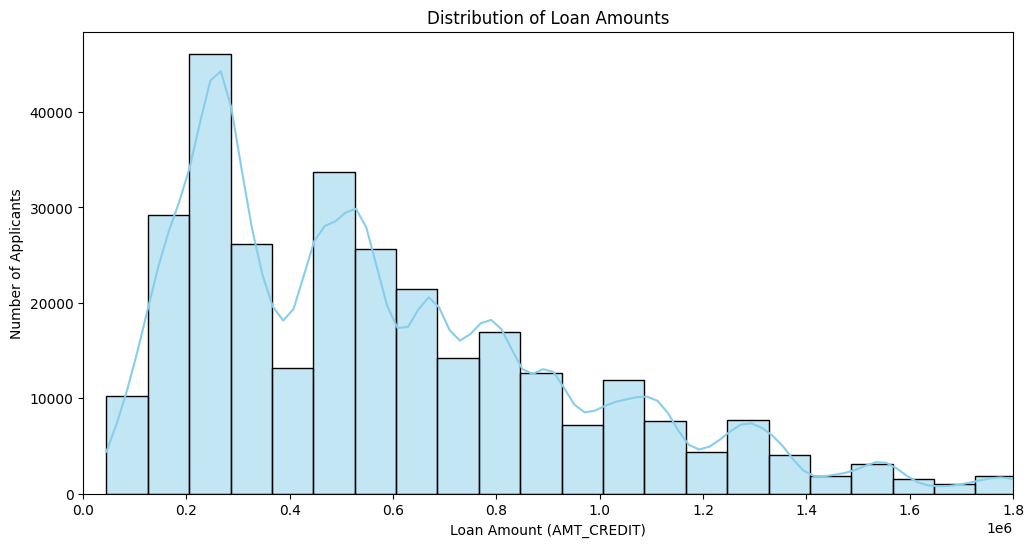

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.histplot(
    df['AMT_CREDIT'],
    bins=50,
    kde=True,
    color='skyblue'
)

plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (AMT_CREDIT)')
plt.ylabel('Number of Applicants')
plt.xlim(0, df['AMT_CREDIT'].quantile(0.99))  # Optional: exclude extreme outliers for clarity
plt.show()

In [45]:
#### 19
df[['AMT_CREDIT', 'AMT_GOODS_PRICE']].corr()


,AMT_CREDIT,AMT_GOODS_PRICE
AMT_CREDIT,1.000000,0.986745
AMT_GOODS_PRICE,0.986745,1.000000


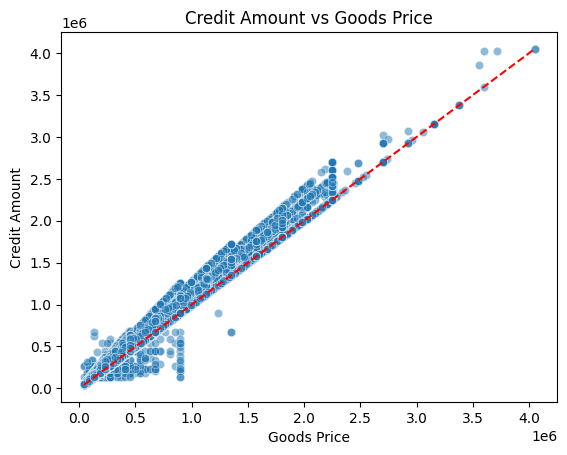

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=df, alpha=0.5)
plt.plot([df['AMT_GOODS_PRICE'].min(), df['AMT_GOODS_PRICE'].max()],
         [df['AMT_GOODS_PRICE'].min(), df['AMT_GOODS_PRICE'].max()], 
         color='red', linestyle='--')
plt.xlabel('Goods Price')
plt.ylabel('Credit Amount')
plt.title('Credit Amount vs Goods Price')
plt.show()


In [ ]:
####20

In [47]:
#####20
# Count of each income type
income_type_counts = df['NAME_INCOME_TYPE'].value_counts()

# Display the result
print(income_type_counts)

NAME_INCOME_TYPE
Working                 157816
Commercial associate     69916
Pensioner                55168
State servant            21468
Unemployed                  22
Student                     17
Maternity leave              5
Businessman                  5
Name: count, dtype: int64


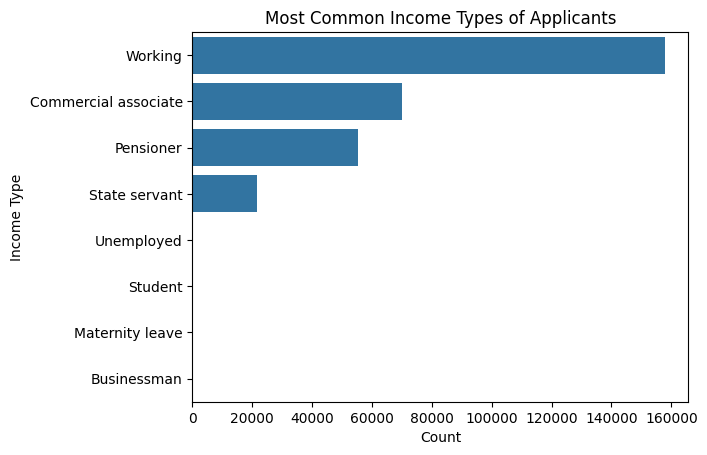

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, y='NAME_INCOME_TYPE', order=df['NAME_INCOME_TYPE'].value_counts().index)
plt.title('Most Common Income Types of Applicants')
plt.xlabel('Count')
plt.ylabel('Income Type')
plt.show()

In [ ]:
####21

In [49]:
# Group by income type and calculate default rate (mean of TARGET)
default_rates = df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False)

# Display result
print(default_rates)

NAME_INCOME_TYPE
Maternity leave         0.400000
Unemployed              0.363636
Working                 0.096023
Commercial associate    0.075476
State servant           0.057714
Pensioner               0.053962
Businessman             0.000000
Student                 0.000000
Name: TARGET, dtype: float64


C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\2829595508.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_rates_df, x='TARGET', y='NAME_INCOME_TYPE', palette='coolwarm')


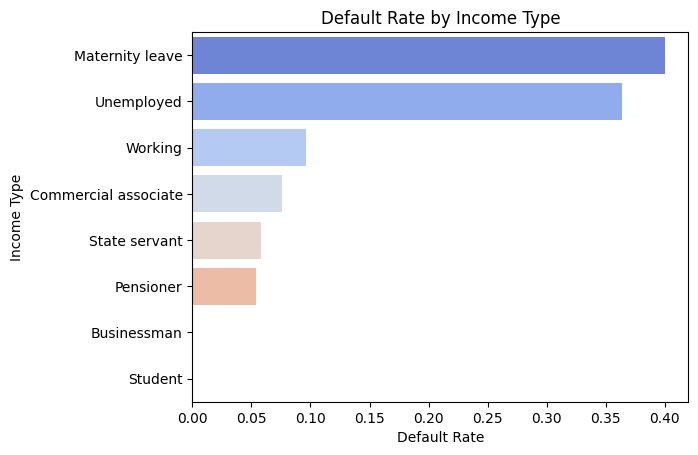

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert series to DataFrame for plotting
default_rates_df = default_rates.reset_index()

sns.barplot(data=default_rates_df, x='TARGET', y='NAME_INCOME_TYPE', palette='coolwarm')
plt.xlabel('Default Rate')
plt.ylabel('Income Type')
plt.title('Default Rate by Income Type')
plt.show()

In [51]:
### 22
# Create a new column for Credit to Income Ratio
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
# Filter out extreme ratios (e.g., those above 10)
df_filtered = df[df['CREDIT_INCOME_RATIO'] < 10]

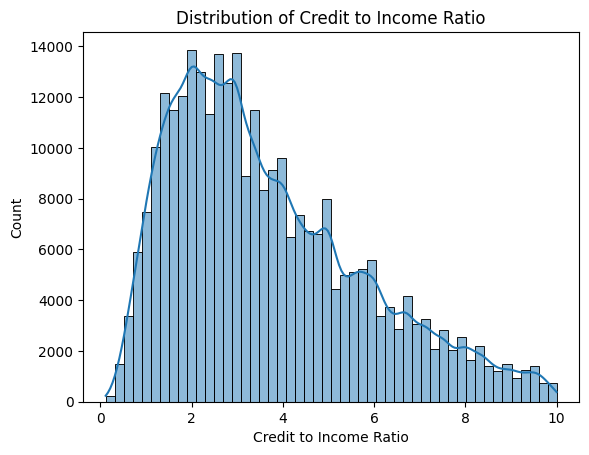

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution
sns.histplot(df_filtered['CREDIT_INCOME_RATIO'], bins=50, kde=True)
plt.xlabel('Credit to Income Ratio')
plt.title('Distribution of Credit to Income Ratio')
plt.show()

C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\2608494180.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratio_default = df_filtered.groupby('RATIO_BIN')['TARGET'].agg(


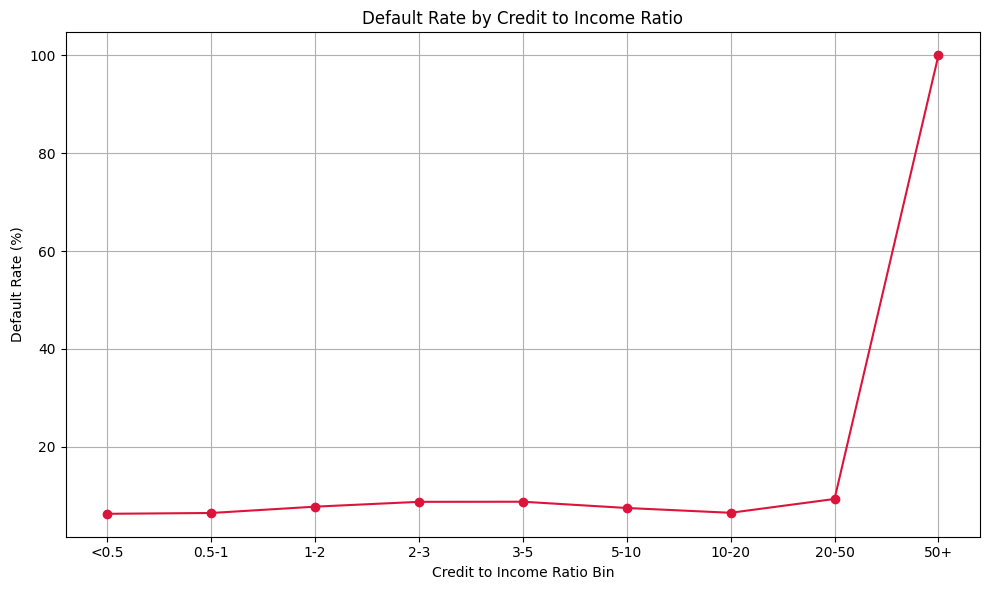

In [53]:
####23
### 23

import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df[(df['AMT_INCOME_TOTAL'] > 0) & df['AMT_CREDIT'].notna()]

df_filtered['CREDIT_INCOME_RATIO'] = df_filtered['AMT_CREDIT'] / df_filtered['AMT_INCOME_TOTAL']

bins = [0, 0.5, 1, 2, 3, 5, 10, 20, 50, 100]
labels = ['<0.5', '0.5-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20-50', '50+']
df_filtered['RATIO_BIN'] = pd.cut(df_filtered['CREDIT_INCOME_RATIO'], bins=bins, labels=labels, right=False)

ratio_default = df_filtered.groupby('RATIO_BIN')['TARGET'].agg(
    Total='count',
    Defaults='sum'
)
ratio_default['Default Rate (%)'] = (ratio_default['Defaults'] / ratio_default['Total']) * 100

plt.figure(figsize=(10, 6))
plt.plot(ratio_default.index.astype(str), ratio_default['Default Rate (%)'], marker='o', linestyle='-', color='crimson')
plt.title('Default Rate by Credit to Income Ratio')
plt.xlabel('Credit to Income Ratio Bin')
plt.ylabel('Default Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
####24

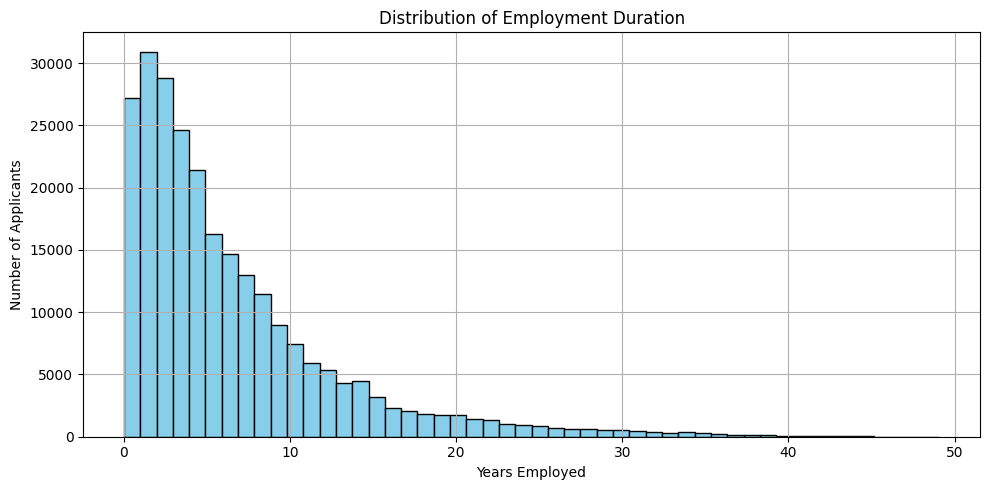

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Replace special value (365243) with NaN
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, pd.NA)

# Step 2: Convert to positive values (optional, for easier plotting)
df['YEARS_EMPLOYED'] = -df['DAYS_EMPLOYED'] / 365

# Step 3: Plot the distribution
plt.figure(figsize=(10, 5))
plt.hist(df['YEARS_EMPLOYED'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Years Employed')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Employment Duration')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
####25

C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\13580856.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['EMPLOYMENT_GROUP'] = pd.cut(df_clean['YEARS_EMPLOYED'], bins=bins, labels=labels)
C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\13580856.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = df_clean.groupby('EMPLOYMENT_GROUP')['TARGET'].mean().reset_index()


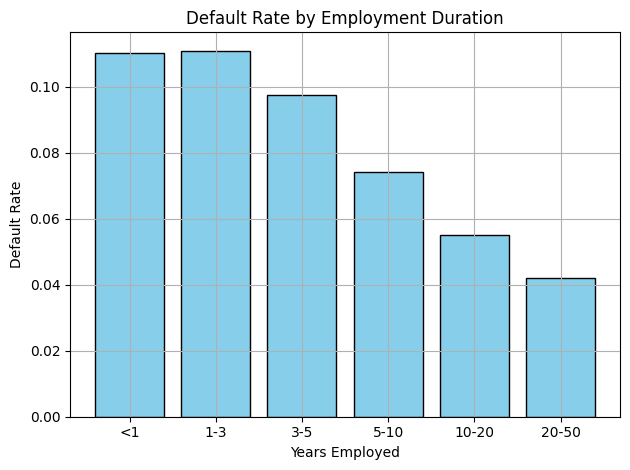

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Replace the special value (365243) with np.nan
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)

# Convert to years (positive)
df['YEARS_EMPLOYED'] = -df['DAYS_EMPLOYED'] / 365

# Drop missing values to avoid errors
df_clean = df.dropna(subset=['YEARS_EMPLOYED', 'TARGET'])

# Create bins (groups of employment duration)
bins = [0, 1, 3, 5, 10, 20, 50]
labels = ['<1', '1-3', '3-5', '5-10', '10-20', '20-50']
df_clean['EMPLOYMENT_GROUP'] = pd.cut(df_clean['YEARS_EMPLOYED'], bins=bins, labels=labels)

# Calculate average default rate in each group
default_rate = df_clean.groupby('EMPLOYMENT_GROUP')['TARGET'].mean().reset_index()

# Plot the result
plt.bar(default_rate['EMPLOYMENT_GROUP'], default_rate['TARGET'], color='skyblue', edgecolor='black')
plt.xlabel('Years Employed')
plt.ylabel('Default Rate')
plt.title('Default Rate by Employment Duration')
plt.grid(True)
plt.tight_layout()
plt.show()


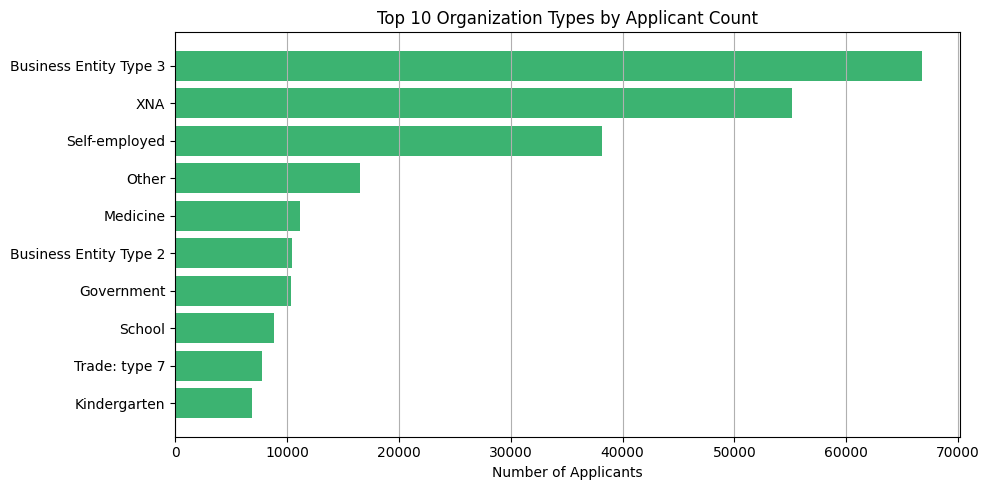

In [56]:
####26


# Count how many applicants in each organization type
org_counts = df['ORGANIZATION_TYPE'].value_counts().reset_index()
org_counts.columns = ['ORGANIZATION_TYPE', 'NUM_APPLICANTS']

# Show the top 10 most common types
top_orgs = org_counts.head(10)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_orgs['ORGANIZATION_TYPE'], top_orgs['NUM_APPLICANTS'], color='mediumseagreen')
plt.xlabel('Number of Applicants')
plt.title('Top 10 Organization Types by Applicant Count')
plt.gca().invert_yaxis()  # Highest bar on top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [57]:
####27
import pandas as pd

# Drop rows where ORGANIZATION_TYPE is missing
df_clean = df.dropna(subset=['ORGANIZATION_TYPE'])

# Group by ORGANIZATION_TYPE and calculate average default rate
org_default = df_clean.groupby('ORGANIZATION_TYPE')['TARGET'].mean().reset_index()

# Sort from high to low default rate
org_default_sorted = org_default.sort_values(by='TARGET', ascending=False)

# Show top 5 risky sectors
print("Top 5 Highest Default Rate:")
print(org_default_sorted.head(5))

# Show top 5 safest sectors
print("\nTop 5 Lowest Default Rate:")
print(org_default_sorted.tail(5))


Top 5 Highest Default Rate:
    ORGANIZATION_TYPE    TARGET
54  Transport: type 3  0.158475
18  Industry: type 13  0.134328
25   Industry: type 8  0.125000
7        Construction  0.117665
38         Restaurant  0.117549

Top 5 Lowest Default Rate:
    ORGANIZATION_TYPE    TARGET
56         University  0.048930
50      Trade: type 6  0.044728
52  Transport: type 1  0.040609
17  Industry: type 12  0.035912
48      Trade: type 4  0.031746


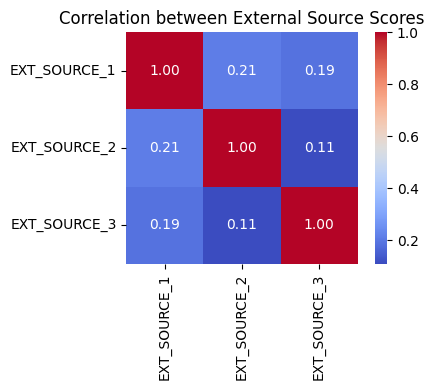

In [58]:
####28


# Select only the 3 external source columns
ext_sources = df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

# Compute correlation matrix (automatically ignores NaNs)
correlation = ext_sources.corr()

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation between External Source Scores')
plt.tight_layout()
plt.show()


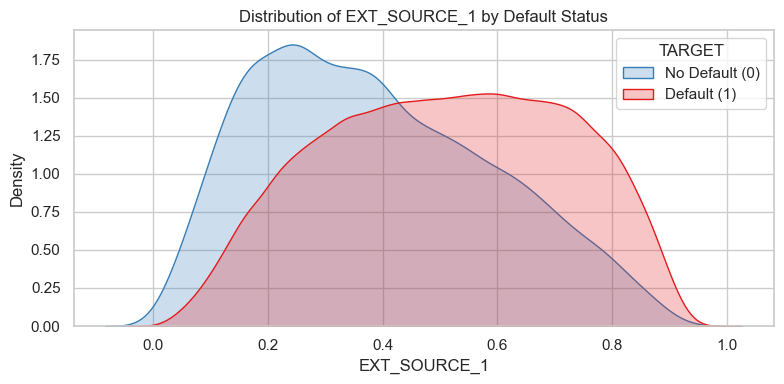

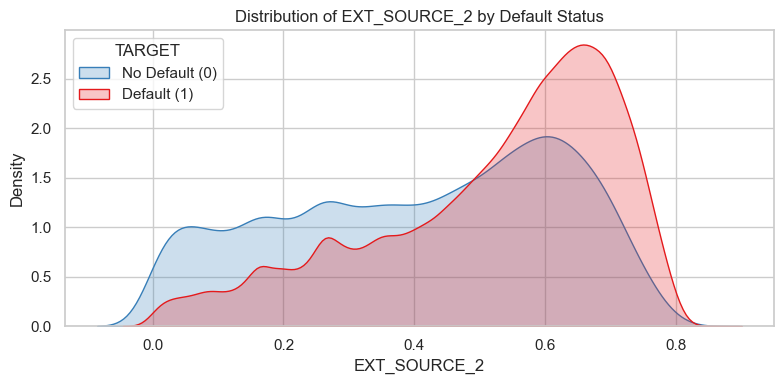

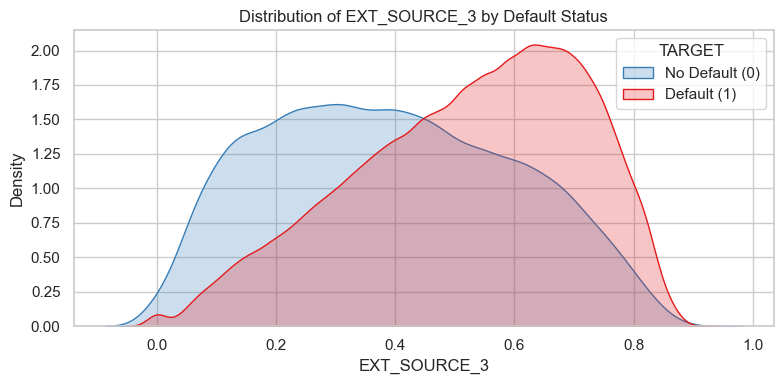

In [59]:
####29
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create 3 plots – one for each EXT_SOURCE
for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue='TARGET', common_norm=False, fill=True, palette='Set1')
    plt.title(f'Distribution of {col} by Default Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='TARGET', labels=['No Default (0)', 'Default (1)'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()


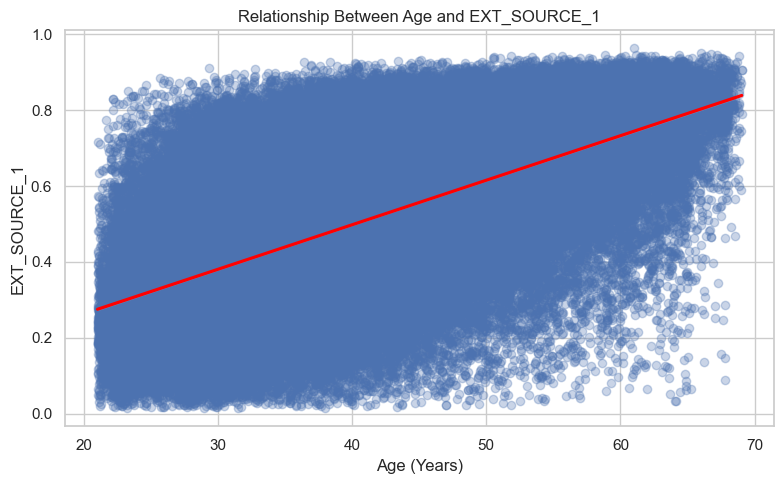

In [60]:
#####30

# Convert DAYS_BIRTH to positive years
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365

# Drop missing EXT_SOURCE_1 values
df_clean = df.dropna(subset=['EXT_SOURCE_1'])

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(data=df_clean, x='AGE_YEARS', y='EXT_SOURCE_1', scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.xlabel('Age (Years)')
plt.ylabel('EXT_SOURCE_1')
plt.title('Relationship Between Age and EXT_SOURCE_1')
plt.grid(True)
plt.tight_layout()
plt.show()


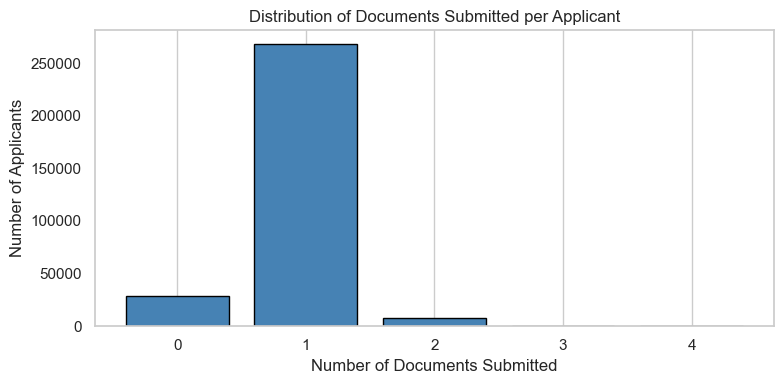

In [61]:
####31

# Step 1: Select all FLAG_DOCUMENT_ columns
doc_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]

# Step 2: Count how many documents each applicant submitted
df['NUM_DOCS_SUBMITTED'] = df[doc_cols].sum(axis=1)

# Step 3: Check distribution
doc_counts = df['NUM_DOCS_SUBMITTED'].value_counts().sort_index()

# Step 4: Plot
plt.figure(figsize=(8, 4))
plt.bar(doc_counts.index, doc_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Number of Documents Submitted')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Documents Submitted per Applicant')
plt.xticks(doc_counts.index)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [62]:
####32
import pandas as pd

# Group by whether document 3 was submitted (1 = yes, 0 = no)
doc3_default_rate = df.groupby('FLAG_DOCUMENT_3')['TARGET'].mean().reset_index()

# Rename columns for clarity
doc3_default_rate.columns = ['FLAG_DOCUMENT_3', 'DEFAULT_RATE']

# Print results
print(doc3_default_rate)


   FLAG_DOCUMENT_3  DEFAULT_RATE
0                0      0.062134
1                1      0.088623


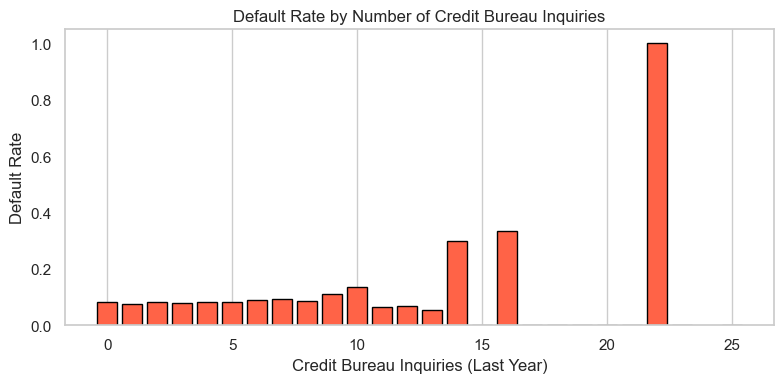

In [63]:
####33

# Step 1: Fill missing values (optional, treat as 0 or drop)
df['AMT_REQ_CREDIT_BUREAU_YEAR'] = df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

# Step 2: Group by number of inquiries and calculate default rate
inquiry_default = df.groupby('AMT_REQ_CREDIT_BUREAU_YEAR')['TARGET'].mean().reset_index()

# Step 3: Plot
plt.figure(figsize=(8, 4))
plt.bar(inquiry_default['AMT_REQ_CREDIT_BUREAU_YEAR'], inquiry_default['TARGET'], color='tomato', edgecolor='black')
plt.xlabel('Credit Bureau Inquiries (Last Year)')
plt.ylabel('Default Rate')
plt.title('Default Rate by Number of Credit Bureau Inquiries')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


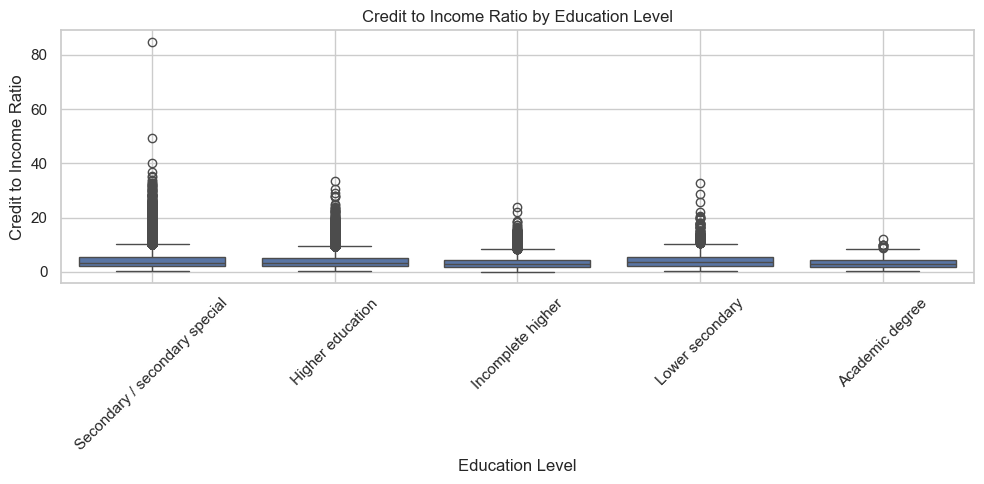

In [64]:
####34


# Step 1: Create the Credit to Income Ratio
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

# Step 2: Drop rows with missing or infinite values
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['CREDIT_INCOME_RATIO', 'NAME_EDUCATION_TYPE'])

# Step 3: Plot the distribution using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='NAME_EDUCATION_TYPE', y='CREDIT_INCOME_RATIO')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Credit to Income Ratio')
plt.title('Credit to Income Ratio by Education Level')
plt.grid(True)
plt.tight_layout()
plt.show()


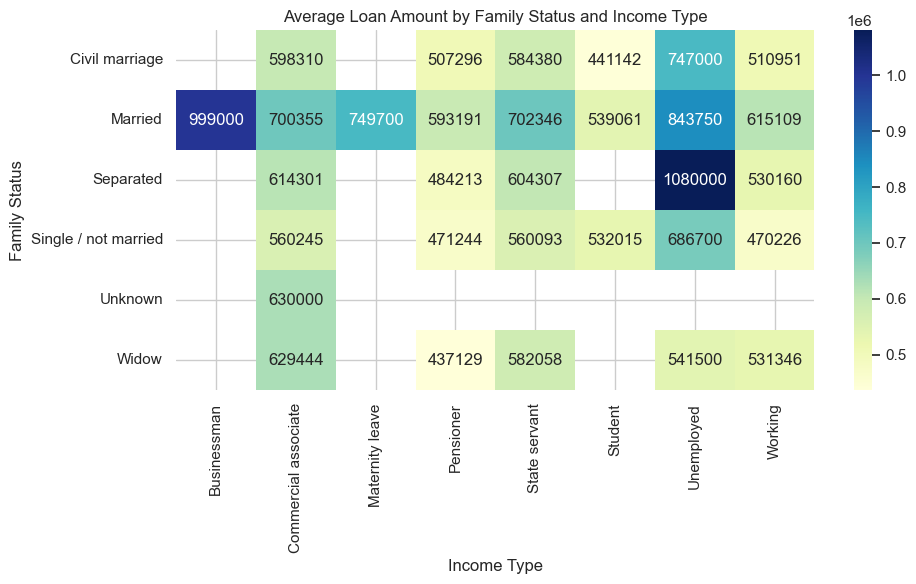

In [65]:
####35

# Step 1: Create a pivot table of average loan amount
pivot_table = df.pivot_table(
    index='NAME_FAMILY_STATUS',
    columns='NAME_INCOME_TYPE',
    values='AMT_CREDIT',
    aggfunc='mean'
)

# Step 2: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Loan Amount by Family Status and Income Type')
plt.xlabel('Income Type')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()


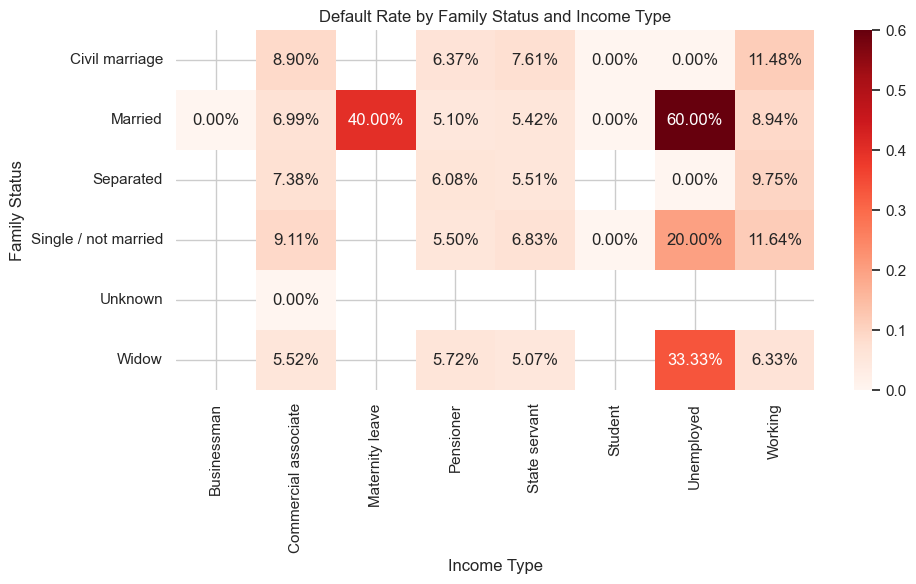

In [66]:
###36


# Step 1: Create a pivot table of average TARGET (default rate)
pivot_default = df.pivot_table(
    index='NAME_FAMILY_STATUS',
    columns='NAME_INCOME_TYPE',
    values='TARGET',
    aggfunc='mean'
)

# Step 2: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_default, annot=True, fmt=".2%", cmap='Reds')
plt.title('Default Rate by Family Status and Income Type')
plt.xlabel('Income Type')
plt.ylabel('Family Status')
plt.tight_layout()
plt.show()


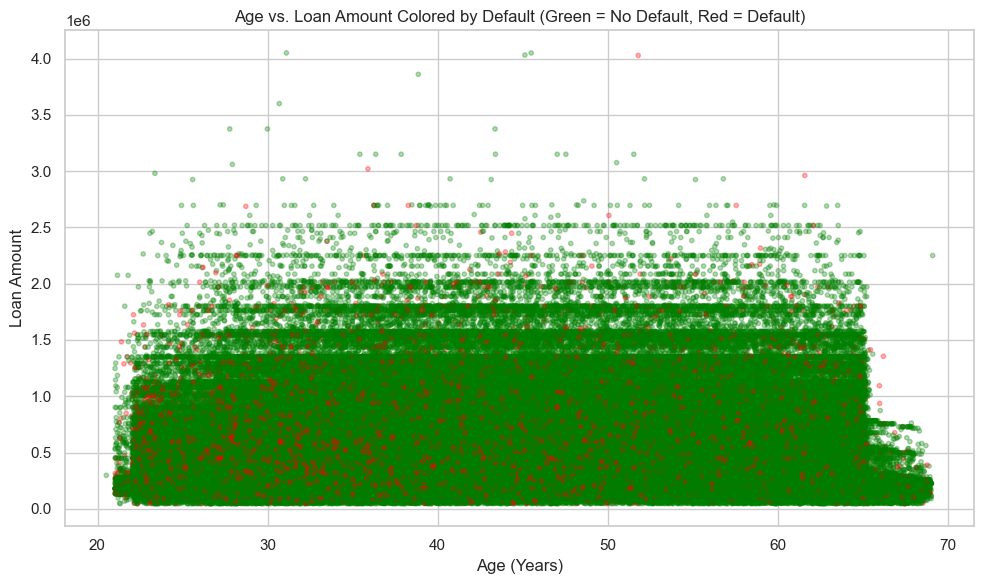

In [67]:
###37

# Step 1: Convert DAYS_BIRTH to Age in Years
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365

# Step 2: Plot
plt.figure(figsize=(10, 6))
colors = ['green' if t == 0 else 'red' for t in df['TARGET']]

plt.scatter(df['AGE_YEARS'], df['AMT_CREDIT'], c=colors, alpha=0.3, s=10)
plt.xlabel('Age (Years)')
plt.ylabel('Loan Amount')
plt.title('Age vs. Loan Amount Colored by Default (Green = No Default, Red = Default)')
plt.grid(True)
plt.tight_layout()
plt.show()


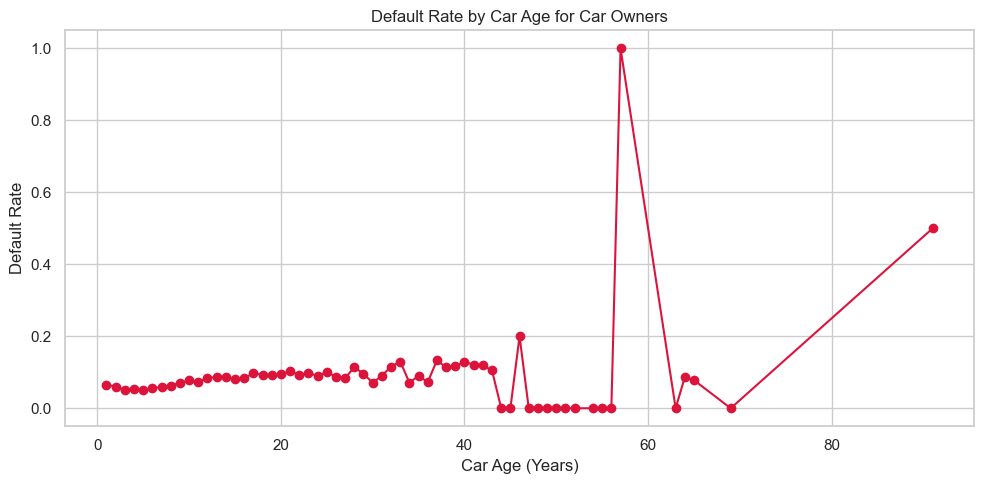

In [68]:
###38

# Step 1: Filter only applicants who own a car and have car age info
df_car_owners = df[(df['OWN_CAR_AGE'].notna()) & (df['OWN_CAR_AGE'] > 0)]

# Step 2: Group by car age and calculate default rate
car_age_default = df_car_owners.groupby('OWN_CAR_AGE')['TARGET'].mean().reset_index()

# Step 3: Plot default rate vs. car age
plt.figure(figsize=(10, 5))
plt.plot(car_age_default['OWN_CAR_AGE'], car_age_default['TARGET'], color='crimson', marker='o')
plt.xlabel('Car Age (Years)')
plt.ylabel('Default Rate')
plt.title('Default Rate by Car Age for Car Owners')
plt.grid(True)
plt.tight_layout()
plt.show()


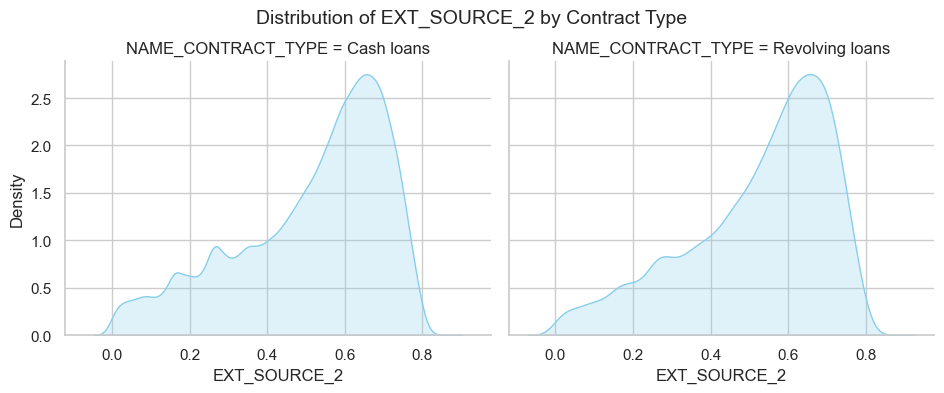

In [69]:
###39

# Drop missing EXT_SOURCE_2 values
df_clean = df.dropna(subset=['EXT_SOURCE_2', 'NAME_CONTRACT_TYPE'])

# Create facet plot
g = sns.FacetGrid(df_clean, col='NAME_CONTRACT_TYPE', height=4, aspect=1.2)
g.map(sns.kdeplot, 'EXT_SOURCE_2', fill=True, common_norm=False, color='skyblue')
g.set_axis_labels('EXT_SOURCE_2', 'Density')
g.fig.suptitle('Distribution of EXT_SOURCE_2 by Contract Type', fontsize=14)
g.tight_layout()
g.fig.subplots_adjust(top=0.85)  # Adjust to fit title
plt.show()


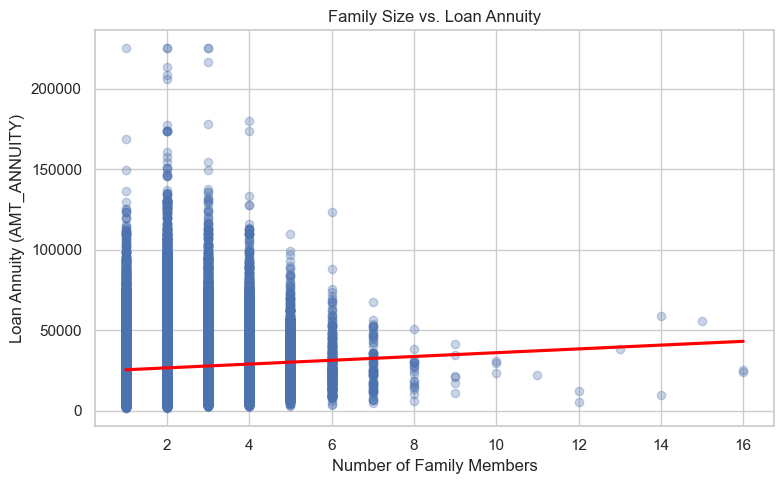

In [70]:
###40

# Optional: clean outliers or missing values
df_clean = df[['CNT_FAM_MEMBERS', 'AMT_ANNUITY']].dropna()
df_clean = df_clean[df_clean['CNT_FAM_MEMBERS'] < 20]  # remove extreme outliers

# Plot: scatter with regression line
plt.figure(figsize=(8, 5))
sns.regplot(data=df_clean, x='CNT_FAM_MEMBERS', y='AMT_ANNUITY', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.xlabel('Number of Family Members')
plt.ylabel('Loan Annuity (AMT_ANNUITY)')
plt.title('Family Size vs. Loan Annuity')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
####41

In [68]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\118304724.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_credit_by_employment = df.groupby('EMPLOY_BIN')['AMT_CREDIT'].mean().reset_index()
C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\118304724.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_credit_by_employment, x='EMPLOY_BIN', y='AMT_CREDIT', palette='Blues_d')


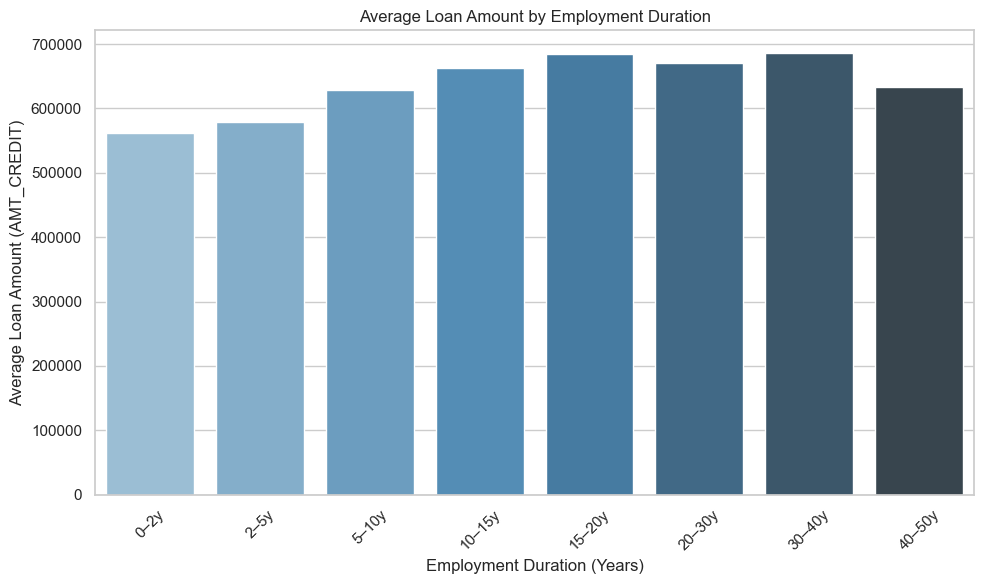

In [71]:



# Step 2: Clean data
df = df[df['DAYS_EMPLOYED'] < 0]  # remove anomalous values like 365243 (retired, etc.)
df['DAYS_EMPLOYED_YEARS'] = (-df['DAYS_EMPLOYED']) / 365  # convert to positive years

# Step 3: Bin employment duration into groups (e.g., 0–2 years, 2–5, etc.)
bins = [0, 2, 5, 10, 15, 20, 30, 40, 50]
labels = ['0–2y', '2–5y', '5–10y', '10–15y', '15–20y', '20–30y', '30–40y', '40–50y']
df['EMPLOY_BIN'] = pd.cut(df['DAYS_EMPLOYED_YEARS'], bins=bins, labels=labels)

# Step 4: Group and calculate average loan amount
avg_credit_by_employment = df.groupby('EMPLOY_BIN')['AMT_CREDIT'].mean().reset_index()

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_credit_by_employment, x='EMPLOY_BIN', y='AMT_CREDIT', palette='Blues_d')
plt.title('Average Loan Amount by Employment Duration')
plt.xlabel('Employment Duration (Years)')
plt.ylabel('Average Loan Amount (AMT_CREDIT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\2914561312.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_employment = df.groupby('EMPLOY_BIN')['EXT_SOURCE_3'].mean().reset_index()
C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\2914561312.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_score_by_employment, x='EMPLOY_BIN', y='EXT_SOURCE_3', palette='Greens_d')


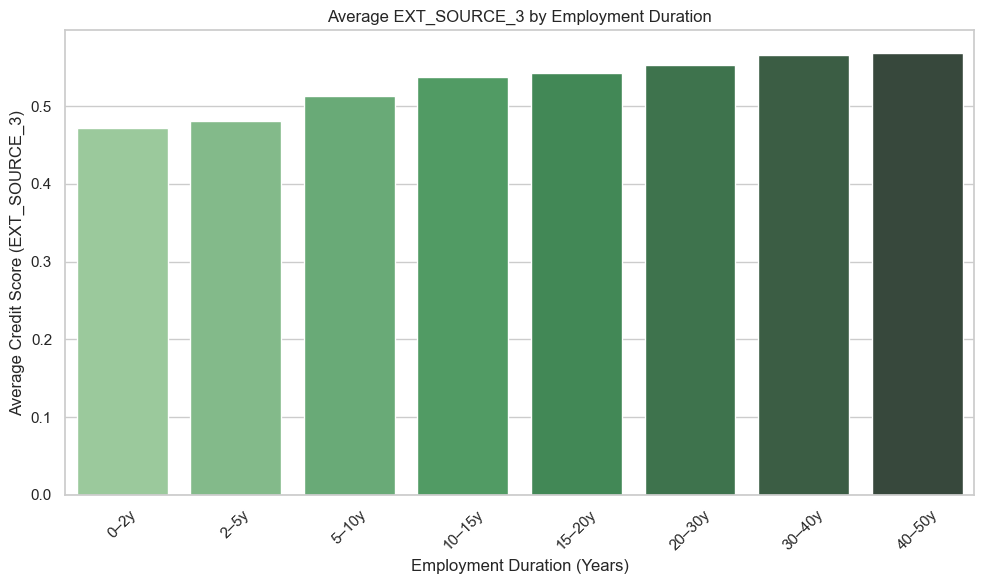

In [72]:
###42


# Step 2: Clean data
df = df[df['DAYS_EMPLOYED'] < 0]  # Exclude placeholders like 365243
df['DAYS_EMPLOYED_YEARS'] = (-df['DAYS_EMPLOYED']) / 365  # Convert to positive years

# Drop missing EXT_SOURCE_3
df = df[df['EXT_SOURCE_3'].notna()]

# Step 3: Bin employment duration
bins = [0, 2, 5, 10, 15, 20, 30, 40, 50]
labels = ['0–2y', '2–5y', '5–10y', '10–15y', '15–20y', '20–30y', '30–40y', '40–50y']
df['EMPLOY_BIN'] = pd.cut(df['DAYS_EMPLOYED_YEARS'], bins=bins, labels=labels)

# Step 4: Group and calculate average EXT_SOURCE_3
avg_score_by_employment = df.groupby('EMPLOY_BIN')['EXT_SOURCE_3'].mean().reset_index()

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_score_by_employment, x='EMPLOY_BIN', y='EXT_SOURCE_3', palette='Greens_d')
plt.title('Average EXT_SOURCE_3 by Employment Duration')
plt.xlabel('Employment Duration (Years)')
plt.ylabel('Average Credit Score (EXT_SOURCE_3)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [75]:
#####43
import numpy as np

# Example: Assign random regions to your data
regions = ['North', 'South', 'East', 'West', 'Central']
df['Region'] = np.random.choice(regions, size=len(df))


In [76]:
default_rate_by_region = df.groupby('Region')['TARGET'].agg(['mean', 'count']) \
                           .rename(columns={'mean': 'Default Rate', 'count': 'Count'}) \
                           .sort_values('Default Rate', ascending=False)

print(default_rate_by_region)


         Default Rate  Count
Region                      
North        0.086136  39786
East         0.084164  39827
South        0.083693  39836
West         0.083280  40454
Central      0.081297  39866


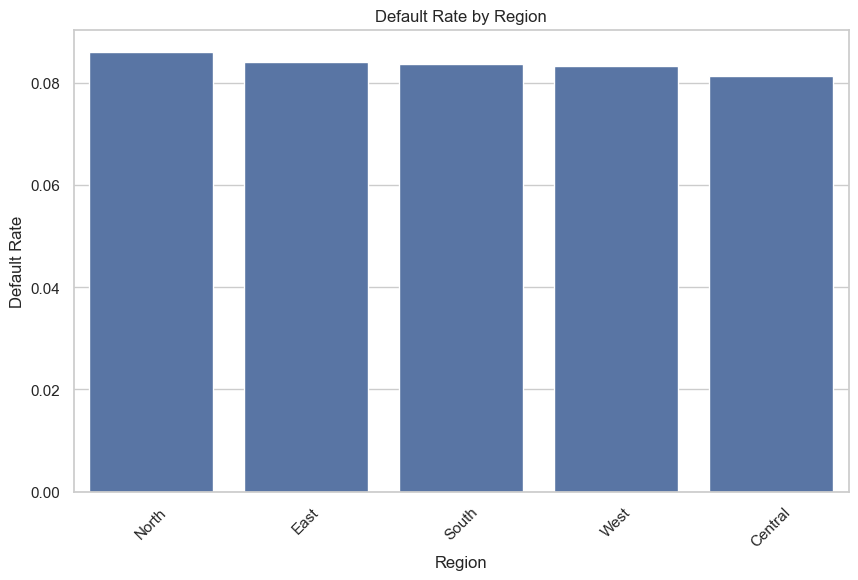

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Region column is now present
plt.figure(figsize=(10, 6))
sns.barplot(data=default_rate_by_region.reset_index(), x='Region', y='Default Rate')
plt.title('Default Rate by Region')
plt.ylabel('Default Rate')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


In [41]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [43]:
####44

import numpy as np

df['CITY'] = np.random.choice(['CityA', 'CityB', 'CityC', 'CityD'], size=len(df))

city_pop = pd.DataFrame({
    'CITY': ['CityA', 'CityB', 'CityC', 'CityD'],
    'POP_DENSITY': [5000, 15000, 8000, 12000]  
})

city_defaults = df.groupby('CITY')['TARGET'].mean().reset_index()


merged = pd.merge(city_defaults, city_pop, on='CITY')

plt.scatter(merged['POP_DENSITY'], merged['TARGET'] * 100, color='tomato')
plt.xlabel('Population Density')
plt.ylabel('Default Rate (%)')
plt.title('Default Rate vs. Population Density')
plt.grid(True)
plt.show()

print("Correlation:", merged['POP_DENSITY'].corr(merged['TARGET']))


AttributeError: module 'numpy' has no attribute 'DataFrame'

                               Default Rate  Applicant Count
NAME_EDUCATION_TYPE                                         
Lower secondary                    0.142520             1270
Secondary / secondary special      0.100890            92883
Incomplete higher                  0.090206             4268
Higher education                   0.060688            27699
Academic degree                    0.034483               58


C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\2344014217.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_default.reset_index(),


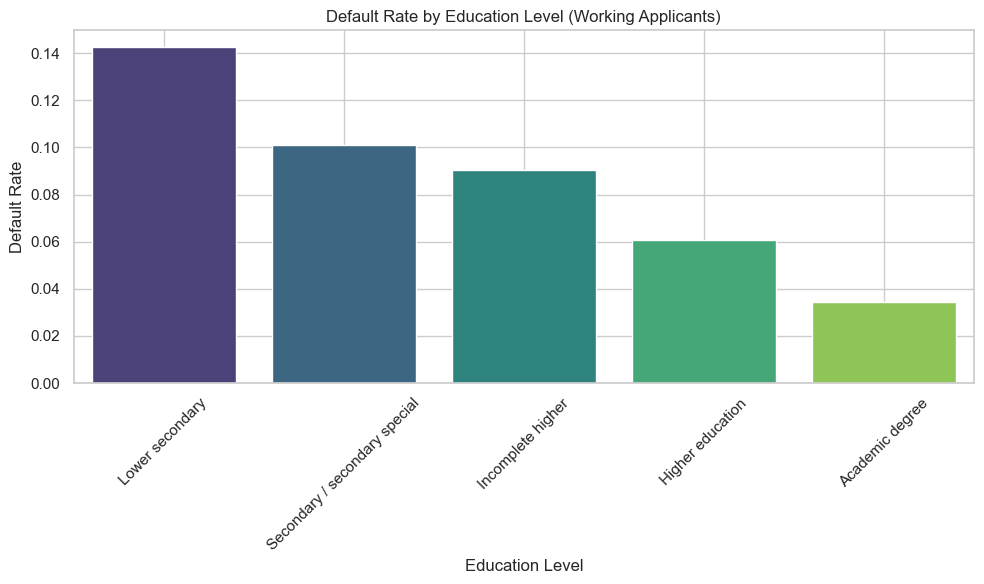

In [78]:
###45

# Step 1: Filter to working applicants only
working_df = df[df['NAME_INCOME_TYPE'] == 'Working']

# Step 2: Group by education level and calculate default rate
edu_default = working_df.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(['mean', 'count']) \
                        .rename(columns={'mean': 'Default Rate', 'count': 'Applicant Count'}) \
                        .sort_values('Default Rate', ascending=False)

print(edu_default)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=edu_default.reset_index(), 
            x='NAME_EDUCATION_TYPE', 
            y='Default Rate',
            palette='viridis')

plt.title('Default Rate by Education Level (Working Applicants)')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\501422640.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AnnuityIncomeRatio'] = df_filtered['AMT_ANNUITY'] / df_filtered['AMT_INCOME_TOTAL']
C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\501422640.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=housing_ratios.reset_index(),


                     Avg Annuity-to-Income Ratio  Applicant Count
NAME_HOUSING_TYPE                                                
House / apartment                       0.176410           175519
Municipal apartment                     0.176032             7132
Co-op apartment                         0.174257              831
Office apartment                        0.169326             1800
With parents                            0.169304            11048
Rented apartment                        0.168042             3428


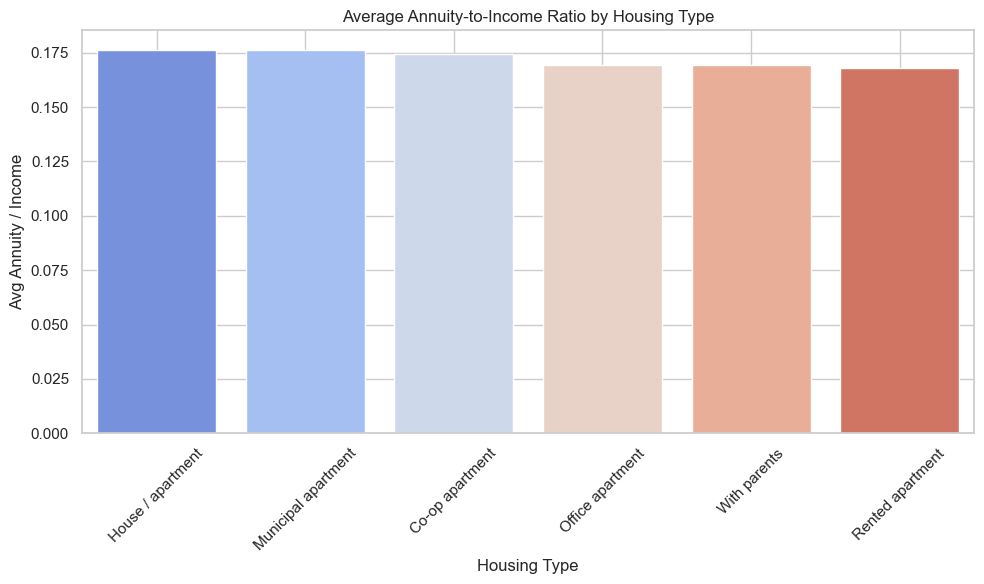

In [79]:
####46

# Step 1: Filter out rows where income or annuity is missing or zero (to avoid division errors)
df_filtered = df[(df['AMT_ANNUITY'] > 0) & (df['AMT_INCOME_TOTAL'] > 0)]

# Step 2: Create the Annuity to Income Ratio
df_filtered['AnnuityIncomeRatio'] = df_filtered['AMT_ANNUITY'] / df_filtered['AMT_INCOME_TOTAL']

# Step 3: Group by housing type and calculate average ratio
housing_ratios = df_filtered.groupby('NAME_HOUSING_TYPE')['AnnuityIncomeRatio'].agg(['mean', 'count']) \
                            .rename(columns={'mean': 'Avg Annuity-to-Income Ratio', 'count': 'Applicant Count'}) \
                            .sort_values('Avg Annuity-to-Income Ratio', ascending=False)

print(housing_ratios)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=housing_ratios.reset_index(), 
            x='NAME_HOUSING_TYPE', 
            y='Avg Annuity-to-Income Ratio', 
            palette='coolwarm')

plt.title('Average Annuity-to-Income Ratio by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Avg Annuity / Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\galiv\AppData\Local\Temp\ipykernel_10968\3923056892.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AnnuityCreditRatio'] = df_filtered['AMT_ANNUITY'] / df_filtered['AMT_CREDIT']


count    199758.000000
mean          0.053198
std           0.022257
min           0.024740
25%           0.036147
50%           0.050000
75%           0.061426
max           0.124430
Name: AnnuityCreditRatio, dtype: float64


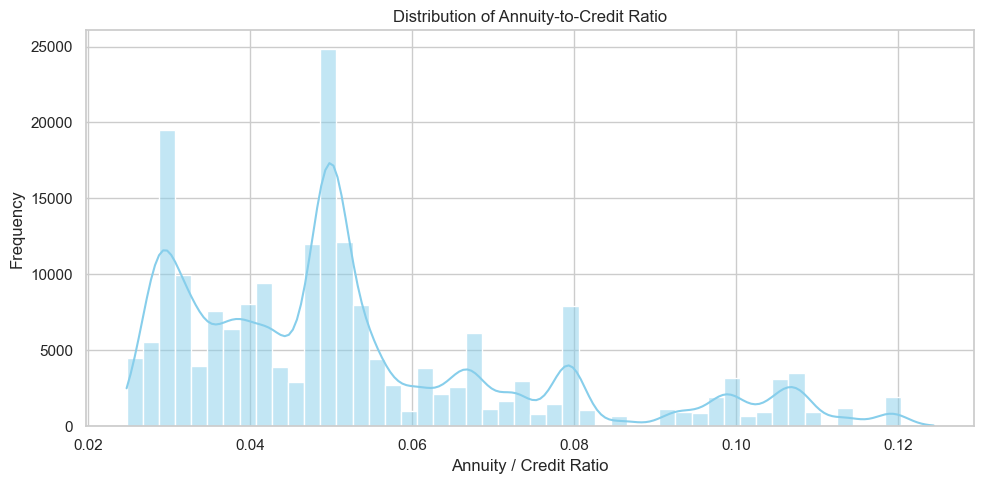

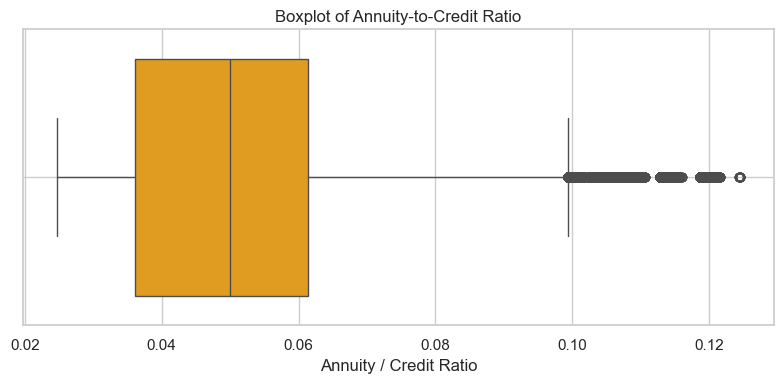

In [80]:
####47

# Step 1: Filter out invalid values (0 or missing)
df_filtered = df[(df['AMT_ANNUITY'] > 0) & (df['AMT_CREDIT'] > 0)]

# Step 2: Create the ratio
df_filtered['AnnuityCreditRatio'] = df_filtered['AMT_ANNUITY'] / df_filtered['AMT_CREDIT']

# Step 3: Summary statistics
print(df_filtered['AnnuityCreditRatio'].describe())

# Step 4: Plot distribution (histogram + KDE)
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['AnnuityCreditRatio'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Annuity-to-Credit Ratio')
plt.xlabel('Annuity / Credit Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Boxplot to spot outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_filtered['AnnuityCreditRatio'], color='orange')
plt.title('Boxplot of Annuity-to-Credit Ratio')
plt.xlabel('Annuity / Credit Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


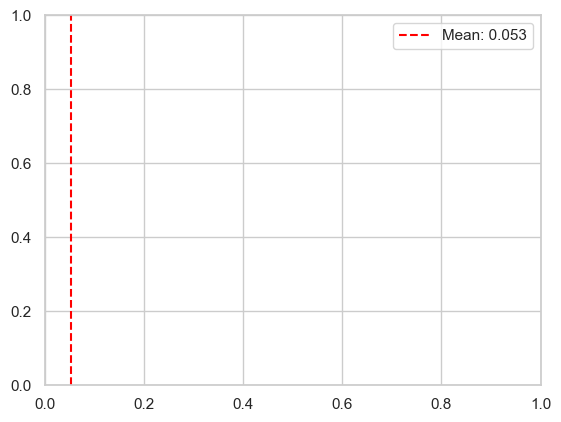

In [81]:
####48
mean_ratio = df_filtered['AnnuityCreditRatio'].mean()
plt.axvline(mean_ratio, color='red', linestyle='--', label=f'Mean: {mean_ratio:.3f}')
plt.legend()


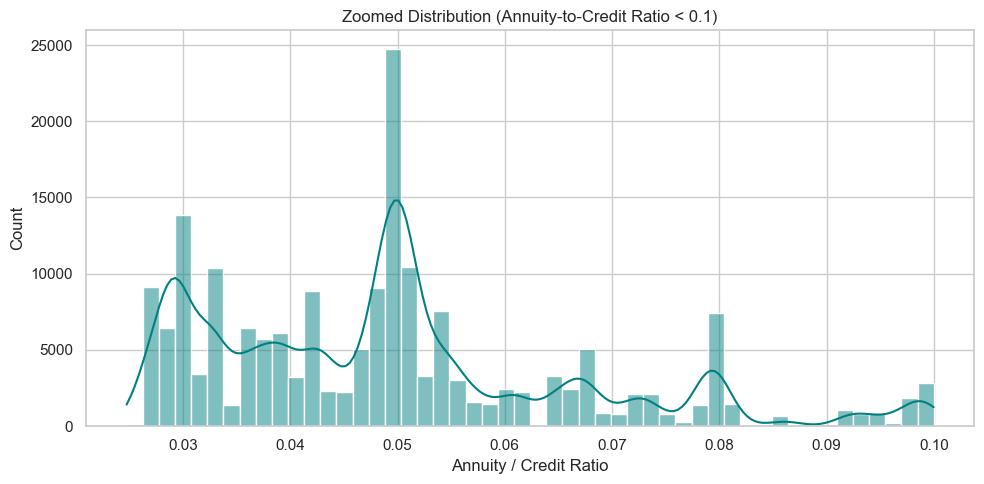

In [82]:
# Histogram zoomed in
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered[df_filtered['AnnuityCreditRatio'] < 0.1]['AnnuityCreditRatio'], 
             bins=50, kde=True, color='teal')
plt.title('Zoomed Distribution (Annuity-to-Credit Ratio < 0.1)')
plt.xlabel('Annuity / Credit Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


Highest risk ORGANIZATION_TYPE: Transport: type 3


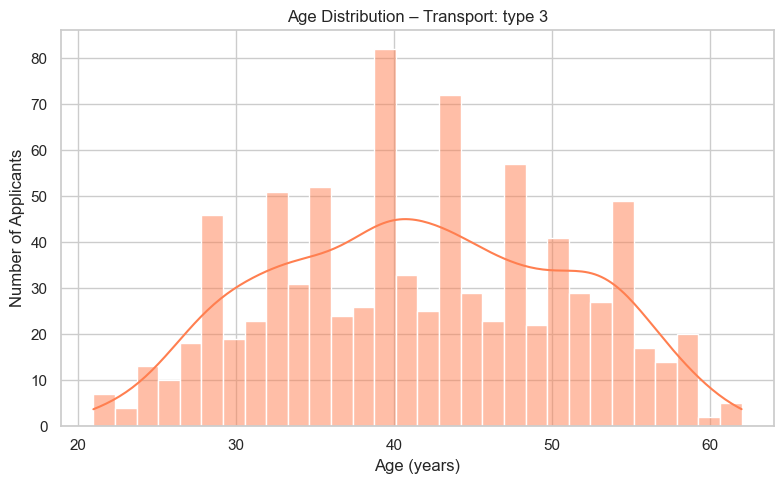

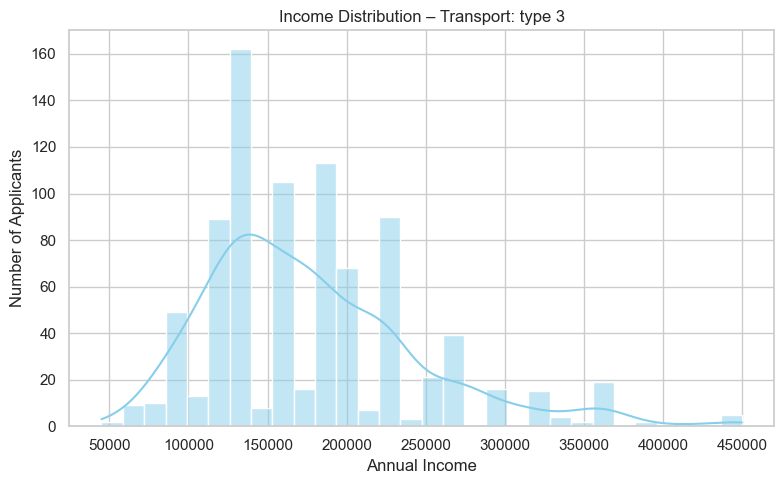

In [83]:
###49

# Step 1: Filter valid values
df_filtered = df[(df['ORGANIZATION_TYPE'].notna()) & (df['DAYS_BIRTH'] < 0) & (df['AMT_INCOME_TOTAL'] > 0)]

# Step 2: Find the highest-risk ORGANIZATION_TYPE
org_default_rates = df_filtered.groupby('ORGANIZATION_TYPE')['TARGET'].mean().sort_values(ascending=False)
risky_org = org_default_rates.idxmax()
print(f"Highest risk ORGANIZATION_TYPE: {risky_org}")

# Step 3: Filter to applicants from that organization type
risky_df = df_filtered[df_filtered['ORGANIZATION_TYPE'] == risky_org].copy()

# Step 4: Convert age in DAYS_BIRTH to years
risky_df['Age'] = (-risky_df['DAYS_BIRTH']) // 365

# Step 5: Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(risky_df['Age'], bins=30, kde=True, color='coral')
plt.title(f'Age Distribution – {risky_org}')
plt.xlabel('Age (years)')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Plot income distribution
plt.figure(figsize=(8, 5))
sns.histplot(risky_df['AMT_INCOME_TOTAL'], bins=30, kde=True, color='skyblue')
plt.title(f'Income Distribution – {risky_org}')
plt.xlabel('Annual Income')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\galiv\AppData\Local\Temp\ipykernel_7608\1855536422.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risky_df['AGE'] = -risky_df['DAYS_BIRTH'] / 365


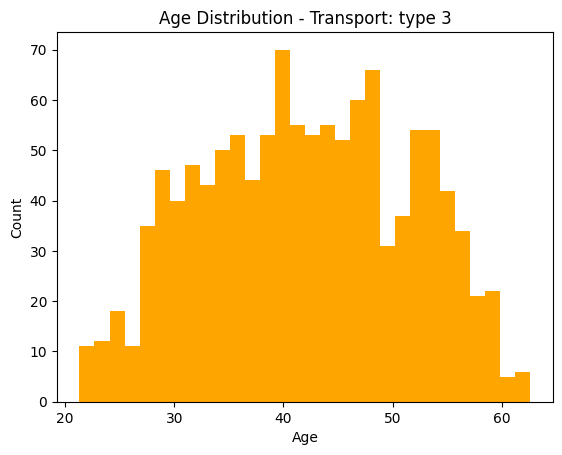

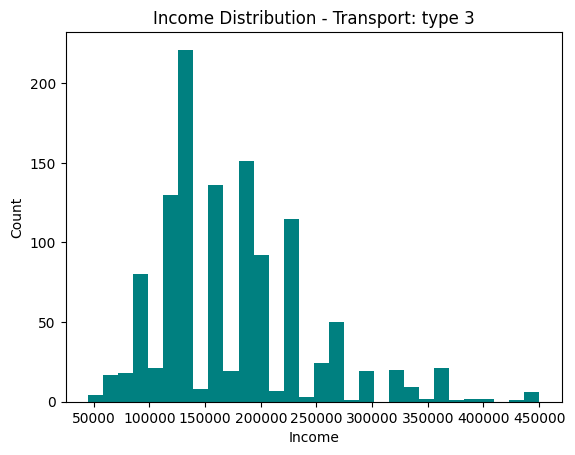

In [39]:
####50
df = df[['ORGANIZATION_TYPE', 'TARGET', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL']].dropna()


riskiest_org = df.groupby('ORGANIZATION_TYPE')['TARGET'].mean().idxmax()

risky_df = df[df['ORGANIZATION_TYPE'] == riskiest_org]

risky_df['AGE'] = -risky_df['DAYS_BIRTH'] / 365

plt.hist(risky_df['AGE'], bins=30, color='orange')
plt.title(f'Age Distribution - {riskiest_org}')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.hist(risky_df['AMT_INCOME_TOTAL'], bins=30, color='teal')
plt.title(f'Income Distribution - {riskiest_org}')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()